# <center><font color = '#DF9166' size = 20 center> **User Engagement Analysis**</font></center>




## <font color = '#DF9166' size=6>**Table of content**<font/><a class = 'anchor' id = 'introduction'/>

1. [**Import Libraries**](#import)
3. [**Data Loading**](#data_loading)
3. [**Data Inspection**](#data_inspection)
4. [**Data Preprocessing**](#data_preprocessing)
5. [**Descriptive Statistics**](#descriptive_statistics)
6. [**Text Analysis**](#text_analysis)
7. [**Time Series Analysis**](#time_series_analysis)
8. [**Publisher Analysis** ](#publisher_analysis)
9. [**Insights and Observations**](#insights)
10. [**Conclusion**](#conclusion)


## <font color = '#DF9166' size=6>**Import Libraries**</font><a class = 'anchor' id = 'import'/>


In [2]:
import sys
import os

sys.path.append(os.path.abspath(os.path.pardir))

In [41]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from glob import glob
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from IPython.display import clear_output
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D


In [4]:
from src.utils.connect_db import *
from src.utils.plot import generate_hist_box_plots
from src.utils.data_preprocessor import handle_outliers
from src.utils.plot import plot_boxplot

In [5]:
warnings.filterwarnings('ignore')

In [6]:
sns.set_style("whitegrid")

In [7]:
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_columns', None)

## <font color = '#DF9166' size=6>**Data Loading**</font><a class = 'anchor' id = 'data_loading'/>

In [8]:
DATA_PATH = 'C:/dev/Side-Projects/10 Acadamy/W2 Challenge/User Engagement and Satisfaction Analysis/data/cleaned_telecom_data.csv'

In [13]:
df = pd.read_csv(DATA_PATH).drop(['Unnamed: 0'], axis=1)
df.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Decile,Total Data (Bytes),Total Data Volume (Bytes),Social Media Total (Bytes),Google Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Email Total (Bytes),Other Total (Bytes)
0,13114483460844900352,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,104608.43895,208201448079117,33664962239,35521209507511,9.16456699548519E+015,42.0,5.0,23.0,44.0,568730.0,20949.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1941949.0,229733.0,37624.0,38787.0,1.046090e+08,Samsung,Samsung Galaxy A5 Sm-A520F,128.0,52.0,164.0,8.0,288.0,8.0,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,6,345629377.0,345629377.0,1570185.0,2905912.0,18355943.0,17855187.0,292426453.0,3701304.0,180558843.0
1,13114483482878900224,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,104608.43895,208201909211140,33681854413,35794009006359,L77566A,65.0,5.0,16.0,26.0,568730.0,20949.5,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1941949.0,229733.0,168.0,3560.0,1.046090e+08,Samsung,Samsung Galaxy J5 (Sm-J530),128.0,52.0,164.0,8.0,288.0,8.0,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,6,707185356.0,707185356.0,1933278.0,4414096.0,39359124.0,35565545.0,609920783.0,937385.0,541959383.0


## <font color = '#DF9166' size=6>**Data Inspection**</font><a class = 'anchor' id = 'data_inspection'/>

In [80]:
print(f"Shape of the Dataset: {df.shape}")

Shape of the Dataset: (150001, 65)


In [9]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg R

## <font color = '#DF9166' size=6>**Data Preprocessing**<font/><a class = 'anchor' id = 'data_preprocessing'/>


### Feature Selection

In [21]:
SELECTED_COLUMNS = [
    "Bearer Id",
    "MSISDN/Number",
    "Dur. (ms)",
    "Total DL (Bytes)",
    "Total UL (Bytes)",
]

In [23]:
filtered_data = df[SELECTED_COLUMNS]
filtered_data.head(2)

,Bearer Id,MSISDN/Number,Dur. (ms),Total DL (Bytes),Total UL (Bytes)
0,13114483460844900352,33664962239,104608.43895,308879636.0,36749741.0
1,13114483482878900224,33681854413,104608.43895,653384965.0,53800391.0


### Aggregation

In [28]:
# Calculate total metrics per customer (MSISDN/Number)
aggregated_data = (
    filtered_data.groupby("MSISDN/Number")
    .agg(
        Total_Session_Frequency=("Bearer Id", "count"),
        Total_Session_Duration=("Dur. (ms)", "sum"),
        Total_DL_Traffic=("Total DL (Bytes)", "sum"),
        Total_UL_Traffic=("Total UL (Bytes)", "sum"),
    )
    .reset_index()
)

# Add Total_DL_Traffic and Total_UL_Traffic to get Total_Traffic
aggregated_data["Total_Traffic"] = (
    aggregated_data["Total_DL_Traffic"] + aggregated_data["Total_UL_Traffic"]
)

aggregated_data.head()

,MSISDN/Number,Total_Session_Frequency,Total_Session_Duration,Total_DL_Traffic,Total_UL_Traffic,Total_Traffic
0,33601001722,1,116720.0,8.426375e+08,36053108.0,8.786906e+08
1,33601001754,1,181230.0,1.207552e+08,36104459.0,1.568596e+08
2,33601002511,1,134969.0,5.566597e+08,39306820.0,5.959665e+08
3,33601007832,1,49878.0,4.019932e+08,20327526.0,4.223207e+08
4,33601008617,2,37104.0,1.363130e+09,94280527.0,1.457411e+09


In [29]:
aggregated_data.shape

(106856, 6)

In [30]:
aggregated_data.nlargest(n=5, columns=['Total_Session_Frequency'])

,MSISDN/Number,Total_Session_Frequency,Total_Session_Duration,Total_DL_Traffic,Total_UL_Traffic,Total_Traffic
13526,33626320676,1084,6.687861e+07,4.946810e+11,4.506949e+10,5.397505e+11
6437,33614892860,17,1.933329e+06,8.156743e+09,6.894830e+08,8.846226e+09
13180,33625779332,17,1.890403e+06,7.770043e+09,7.295774e+08,8.499621e+09
37052,33659725664,16,2.087572e+06,7.081602e+09,6.242603e+08,7.705863e+09
76363,33675877202,15,1.927225e+06,7.309542e+09,5.815688e+08,7.891111e+09


## <font color = '#DF9166' size=6>**Engagement Metrics Analysis**<font/><a class = 'anchor' id = 'engagement_metrics'/>

In [ ]:
top_10_session_frequency = aggregated_data.nlargest(10, 'Total_Session_Frequency')

# Display the top 10 customers for each metric in tabular format
print("Top 10 Customers by Session Frequency:")
top_10_session_frequency[['MSISDN/Number', 'Total_Session_Frequency']]

Top 10 Customers by Session Frequency:


,MSISDN/Number,Total_Session_Frequency
13526,33626320676,1084
6437,33614892860,17
13180,33625779332,17
37052,33659725664,16
76363,33675877202,15
92923,33760536639,15
65118,33667163239,13
666,33603127838,12
1279,33604515716,12
13994,33627080969,12


The Top 10 Customers by Total Traffic are the most data-intensive users, driving significant network activity through high download and upload volumes. These customers likely engage heavily in streaming, gaming, or other data-heavy applications. They represent a high-value segment for the telecom provider, requiring targeted resource allocation to maintain service quality. Additionally, analyzing their app usage can reveal trends and opportunities for tailored plans or service enhancements to boost retention and revenue.

In [36]:
top_10_session_duration = aggregated_data.nlargest(10, 'Total_Session_Duration')
print("\nTop 10 Customers by Session Duration:")
top_10_session_duration[['MSISDN/Number', 'Total_Session_Duration']]


Top 10 Customers by Session Duration:


,MSISDN/Number,Total_Session_Duration
13526,33626320676,6.687861e+07
37052,33659725664,2.087572e+06
6437,33614892860,1.933329e+06
76363,33675877202,1.927225e+06
13180,33625779332,1.890403e+06
92923,33760536639,1.851388e+06
35436,33659359429,1.820832e+06
57241,33664712899,1.620070e+06
106137,33786323068,1.573483e+06
65118,33667163239,1.428216e+06


The **Top 10 Customers by Session Duration** exhibit durations ranging from ~1.4 million ms (23.8 minutes) to ~66.8 million ms (18.6 hours). This indicates heavy, consistent usage, likely involving bandwidth-intensive activities. Such customers are prime targets for high-value service plans and demand optimal network support.

In [35]:
top_10_total_traffic = aggregated_data.nlargest(10, 'Total_Traffic')
print("\nTop 10 Customers by Total Traffic:")
top_10_total_traffic[['MSISDN/Number', 'Total_Traffic']]


Top 10 Customers by Total Traffic:


,MSISDN/Number,Total_Traffic
13526,33626320676,5.397505e+11
6437,33614892860,8.846226e+09
92923,33760536639,8.514774e+09
13180,33625779332,8.499621e+09
76363,33675877202,7.891111e+09
37052,33659725664,7.705863e+09
63028,33666464084,7.308501e+09
92577,33760413819,7.132371e+09
57241,33664712899,6.903964e+09
86455,33698792269,6.540899e+09


The **Top 10 Customers by Total Traffic** show data consumption ranging from ~6.5 billion bytes (~6.1 GB) to a staggering ~540 billion bytes (~503 GB). These users are highly data-intensive, engaging in activities like streaming or heavy downloads. The top user, with over 500 GB usage, significantly outpaces others, highlighting potential reliance on high-speed, high-capacity plans.

In [49]:
print("Descriptive statistics for the aggregated data:\n")
aggregated_data.describe()

Descriptive statistics for the aggregated data:



,MSISDN/Number,Total_Session_Frequency,Total_Session_Duration,Total_DL_Traffic,Total_UL_Traffic,Total_Traffic
count,1.068560e+05,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,4.511474e+10,1.403768,1.303433e+05,6.382138e+08,5.772253e+07,6.959363e+08
std,2.889423e+12,3.408147,2.289303e+05,1.581018e+09,1.422181e+08,1.720477e+09
min,3.360100e+10,1.000000,7.142000e+03,8.827082e+06,9.512288e+06,3.324901e+07
25%,3.365088e+10,1.000000,7.130800e+04,3.148271e+08,3.642382e+07,3.585877e+08
50%,3.366365e+10,1.000000,1.027400e+05,5.703677e+08,4.677551e+07,6.179227e+08
75%,3.368344e+10,2.000000,1.697000e+05,8.073645e+08,6.566037e+07,8.574234e+08
max,8.823971e+14,1084.000000,6.687861e+07,4.946810e+11,4.506949e+10,5.397505e+11


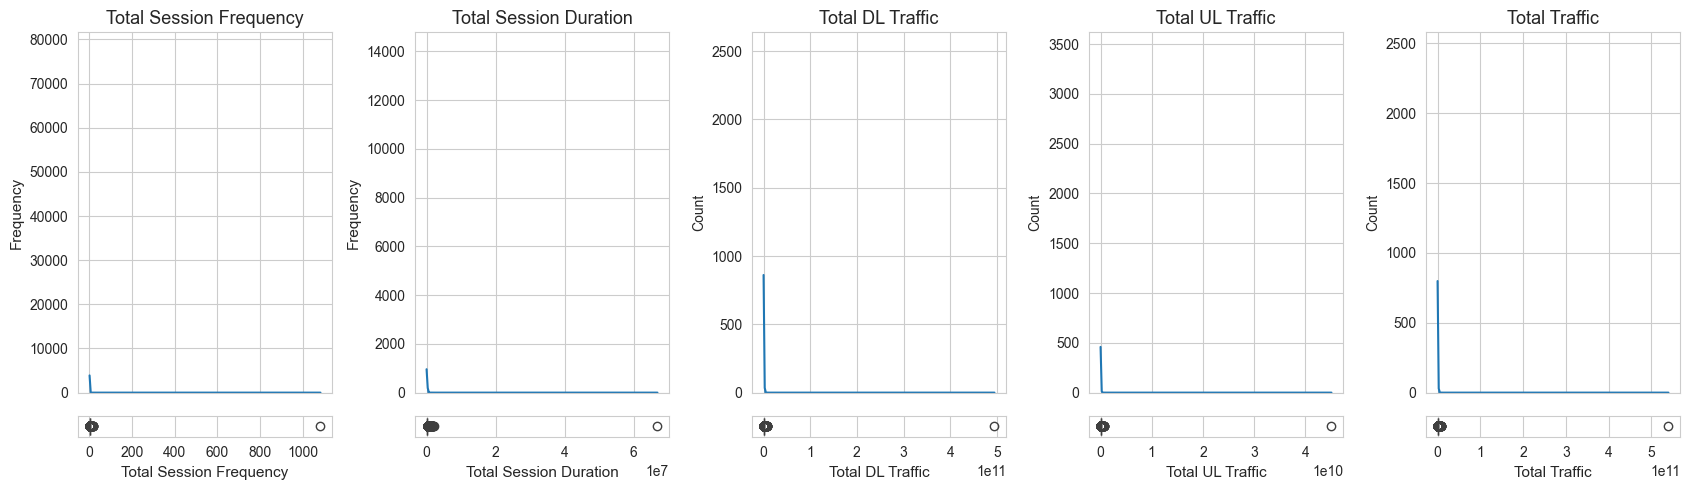

In [50]:
plot_data = [
    {"title": "Total Session Frequency", "column": "Total_Session_Frequency", "label": "Total Session Frequency"},
    {"title": "Total Session Duration", "column": "Total_Session_Duration", "label": "Total Session Duration"},
    {"title": "Total DL Traffic", "column": "Total_DL_Traffic", "label": "Total DL Traffic"},
    {"title": "Total UL Traffic", "column": "Total_UL_Traffic", "label": "Total UL Traffic"},
    {"title": "Total Traffic", "column": "Total_Traffic", "label": "Total Traffic"},
]

generate_hist_box_plots(aggregated_data, plot_data)


**Insights:**

- **Highly Active Users:** A small group of users account for the majority of data traffic, with the maximum session frequency at 1,084, session duration at 1,084 minutes, and total traffic at 539.7 GB.
- **Long Tail Distribution:** Most users show low engagement, with the median session frequency at 1, duration at 1 minute, and total traffic at 57 MB, while a few highly active users generate disproportionately high traffic.
- **Data Consumption Disparity:** Download traffic (mean of 130 KB) significantly exceeds upload traffic (mean of 63.8 MB) on average across all users.
- **Resource Allocation Potential:** The variability in user engagement (e.g., max total traffic at 539.7 GB vs. min at 33.25 MB) suggests opportunities for targeted resource allocation to support highly active users.

## <font color = '#DF9166' size=6>**Cluster Analysis**<font/><a class = 'anchor' id = 'cluster_analysis'/>

### Normalization

In [40]:
metrics_to_normalize = aggregated_data.columns

scaler = MinMaxScaler()
normalized_data = aggregated_data.copy()
normalized_data[metrics_to_normalize] = scaler.fit_transform(aggregated_data[metrics_to_normalize])

normalized_data.head()


,MSISDN/Number,Total_Session_Frequency,Total_Session_Duration,Total_DL_Traffic,Total_UL_Traffic,Total_Traffic
0,0.000000e+00,0.000000,0.001639,0.001686,0.000589,0.001566
1,3.626624e-14,0.000000,0.002603,0.000226,0.000590,0.000229
2,8.941893e-13,0.000000,0.001912,0.001107,0.000661,0.001043
3,6.924584e-12,0.000000,0.000639,0.000795,0.000240,0.000721
4,7.814240e-12,0.000923,0.000448,0.002738,0.001881,0.002639


### K-Means Clustering

In [42]:
kmeans = KMeans(n_clusters=3, random_state=42)
normalized_data['Cluster'] = kmeans.fit_predict(normalized_data[metrics_to_normalize])

# Display the clusters added to the data
normalized_data.head()

,MSISDN/Number,Total_Session_Frequency,Total_Session_Duration,Total_DL_Traffic,Total_UL_Traffic,Total_Traffic,Cluster
0,0.000000e+00,0.000000,0.001639,0.001686,0.000589,0.001566,2
1,3.626624e-14,0.000000,0.002603,0.000226,0.000590,0.000229,2
2,8.941893e-13,0.000000,0.001912,0.001107,0.000661,0.001043,2
3,6.924584e-12,0.000000,0.000639,0.000795,0.000240,0.000721,2
4,7.814240e-12,0.000923,0.000448,0.002738,0.001881,0.002639,2


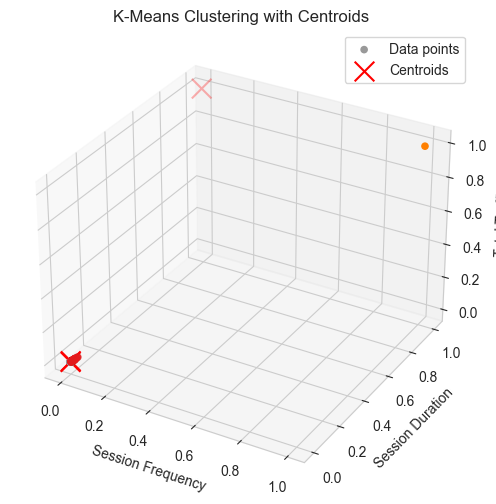

In [46]:
# Extract centroids from k-means
centroids = kmeans.cluster_centers_

# Create 3D scatter plot to visualize centroids
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot of the data points
ax.scatter(
    normalized_data["Total_Session_Frequency"],
    normalized_data["Total_Session_Duration"],
    normalized_data["Total_Traffic"],
    c=normalized_data["Cluster"],
    cmap="Set1",
    label="Data points",
)

# Plot the centroids
ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    centroids[:, 2],
    c="red",
    marker="x",
    s=200,
    label="Centroids",
)

# Labels and title
ax.set_xlabel("Session Frequency")
ax.set_ylabel("Session Duration")
ax.set_zlabel("Total Traffic")
ax.set_title("K-Means Clustering with Centroids")
ax.legend()

plt.show()

## <font color = '#DF9166' size=6>**Application-Specific Analysis**<font/><a class = 'anchor' id = 'user_behavior'/>

###  Traffic Aggregation per Application

In [56]:
# Define the applications and their respective traffic columns
applications = {
    "Social Media": ["Social Media DL (Bytes)", "Social Media UL (Bytes)"],
    "Google": ["Google DL (Bytes)", "Google UL (Bytes)"],
    "Email": ["Email DL (Bytes)", "Email UL (Bytes)"],
    "Youtube": ["Youtube DL (Bytes)", "Youtube UL (Bytes)"],
    "Netflix": ["Netflix DL (Bytes)", "Netflix UL (Bytes)"],
    "Gaming": ["Gaming DL (Bytes)", "Gaming UL (Bytes)"],
    "Other": ["Other DL (Bytes)", "Other UL (Bytes)"]
}

# Initialize a DataFrame to store total traffic for each application
app_traffic = pd.DataFrame()

# Aggregate traffic for each application
for app, cols in applications.items():
    app_traffic[app] = df[cols[0]] + df[cols[1]]

# Add MSISDN/Number for identifying users
app_traffic['MSISDN/Number'] = filtered_data['MSISDN/Number']

# Aggregate traffic per user (MSISDN)
aggregated_app_traffic = app_traffic.groupby('MSISDN/Number').agg(
    {app: 'sum' for app in applications.keys()}
).reset_index()

aggregated_app_traffic.head()

,MSISDN/Number,Social Media,Google,Email,Youtube,Netflix,Gaming,Other
0,33601001722,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,33601001754,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,33601002511,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,33601007832,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,33601008617,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [57]:
# Display the top 10 most engaged users per application
top_10_users_per_app = {}
for app in applications.keys():
    top_10_users_per_app[app] = aggregated_app_traffic.nlargest(10, app)[['MSISDN/Number', app]]

# Display top 10 users for each application
for app, top_10 in top_10_users_per_app.items():
    print(f"Top 10 Most Engaged Users for {app}:")
    print(top_10)
    print("\n")

Top 10 Most Engaged Users for Social Media:
        MSISDN/Number  Social Media
13526     33626320676  2.017192e+09
92923     33760536639  3.978319e+07
37052     33659725664  3.541236e+07
6437      33614892860  2.829454e+07
13180     33625779332  2.713550e+07
65118     33667163239  2.424785e+07
106137    33786323068  2.397492e+07
70960     33669068942  2.380083e+07
666       33603127838  2.307782e+07
31331     33658490784  2.300007e+07


Top 10 Most Engaged Users for Google:
        MSISDN/Number        Google
13526     33626320676  8.400769e+09
13180     33625779332  1.423079e+08
6437      33614892860  1.279738e+08
92923     33760536639  1.232231e+08
37052     33659725664  1.165163e+08
106137    33786323068  1.102545e+08
76363     33675877202  1.098605e+08
65118     33667163239  1.050327e+08
94654     33761268199  9.708999e+07
86313     33698756430  9.193515e+07


Top 10 Most Engaged Users for Email:
        MSISDN/Number         Email
13526     33626320676  2.442299e+09
6437      336

In [59]:
print("Descriptive statistics for application traffic:\n")
app_traffic.describe()

Descriptive statistics for application traffic:



,Social Media,Google,Email,Youtube,Netflix,Gaming,Other,MSISDN/Number
count,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.828250e+06,7.807295e+06,2.259102e+06,2.264348e+07,2.262861e+07,4.303331e+08,4.293653e+08,4.182414e+10
std,1.035646e+06,3.516420e+06,1.071109e+06,9.246800e+06,9.260820e+06,2.440199e+08,2.432681e+08,2.438731e+12
min,1.563000e+03,4.033000e+04,8.359000e+03,7.890300e+04,9.843200e+04,3.063580e+05,1.490450e+05,3.360100e+10
25%,9.322180e+05,4.943599e+06,1.359344e+06,1.599846e+07,1.597946e+07,2.187279e+08,2.185534e+08,3.365094e+10
50%,1.826471e+06,7.812835e+06,2.263567e+06,2.266177e+07,2.263554e+07,4.316150e+08,4.299865e+08,3.366361e+10
75%,2.727487e+06,1.068280e+07,3.159818e+06,2.929260e+07,2.929044e+07,6.414159e+08,6.399275e+08,3.368307e+10
max,3.650861e+06,1.552878e+07,4.518036e+06,4.519008e+07,4.519815e+07,8.592028e+08,8.595209e+08,8.823971e+14


**Insights:**

- **Traffic Distribution Across Applications:** The average traffic for applications varies widely. **Gaming** generates the highest average traffic (430.3 MB), followed by **Other** applications (429.4 MB), while **Social Media** and **Google** generate comparatively lower average traffic (1.83 MB and 7.8 MB respectively).
  
- **High Variability in Traffic:** There is significant variability in traffic usage across all applications, with **Gaming** and **Other** having the highest standard deviations (244 MB and 243 MB respectively), suggesting a wide range of usage patterns, from casual to very heavy usage.

- **Maximum Traffic:** The maximum traffic for **Gaming** is 859.2 MB, while **Social Media** and **Google** see much lower peaks (3.65 MB and 15.5 MB respectively), indicating that a few users generate disproportionately high traffic in certain apps.

- **Data Consumption Quartiles:** Most users generate moderate traffic across apps, with **Gaming** and **Other** seeing higher usage at the 75th percentile (641 MB and 639 MB), while **Social Media** and **Google** show relatively lower values at the 75th percentile (2.7 MB and 10.7 MB). This suggests that apps like **Gaming** and **Other** attract more engaged users, while **Social Media** and **Google** have a more balanced or lower traffic profile.

- **Potential for Targeted Resource Allocation:** The wide distribution of traffic (e.g., max of 859.2 MB for **Gaming** vs. 3.65 MB for **Social Media**) shows that certain applications may need more network resources to accommodate the highly active users, especially those using **Gaming** and **Other** applications.

In [64]:
# Aggregating the total traffic for each application
app_columns = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
total_traffic_per_app = aggregated_app_traffic[app_columns].sum()
total_traffic_per_app

Social Media    2.742394e+11
Google          1.171102e+12
Email           3.388676e+11
Youtube         3.396545e+12
Netflix         3.394314e+12
Gaming          6.455040e+13
Other           6.440523e+13
dtype: float64

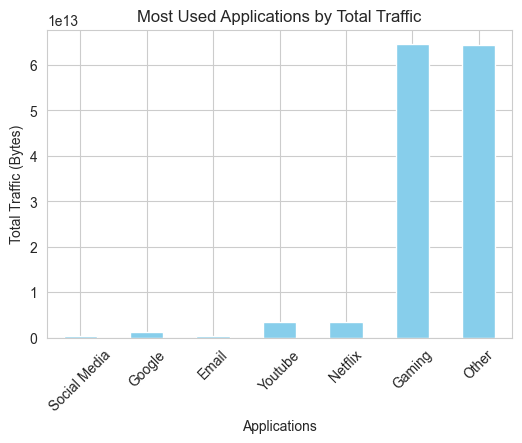

In [68]:
# Bar chart for top 3 applications
plt.figure(figsize=(6, 4))
total_traffic_per_app.plot(kind='bar', color='skyblue')
plt.title('Most Used Applications by Total Traffic')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('Applications')
plt.xticks(rotation=45)
plt.show()


In [65]:
# Sorting the applications by total traffic in descending order
top_3_apps = total_traffic_per_app.sort_values(ascending=False).head(3)
print(top_3_apps)

Gaming     6.455040e+13
Other      6.440523e+13
Youtube    3.396545e+12
dtype: float64


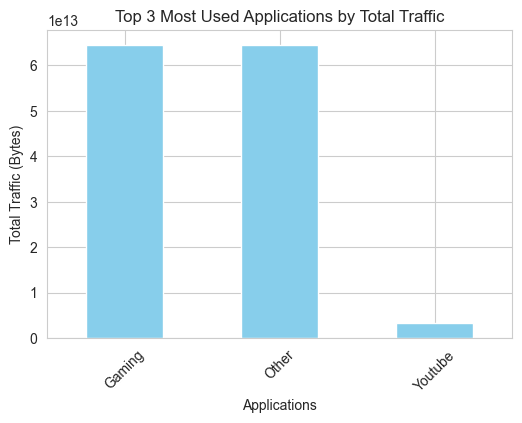

In [78]:
# Bar chart for top 3 applications
plt.figure(figsize=(6, 4))
top_3_apps.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Used Applications by Total Traffic')
plt.ylabel('Total Traffic (Bytes)')
plt.xlabel('Applications')
plt.xticks(rotation=45)
plt.show()


**Key Insights:**

- **Gaming** and **Other** applications dominate traffic, with **6.45e+13** and **6.44e+13** bytes, indicating heavy data consumption.
- **YouTube** and **Netflix** follow closely, each with **3.40e+12** bytes, highlighting the impact of video streaming.
- **Google** and **Email** generate less traffic, with **1.17e+12** and **3.39e+11** bytes, respectively.
- **Social Media** is the least data-consuming, with **2.74e+11** bytes, suggesting lower data usage compared to other categories. 

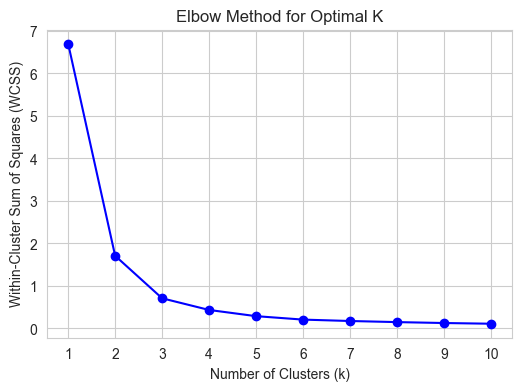

In [79]:
# Define the number of clusters to test
k_values = range(1, 11)  # Testing for k=1 to k=10
wcss = []

# Loop over different values of k to compute WCSS
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(normalized_data[metrics_to_normalize])  # Use normalized engagement metrics for clustering
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(6, 4))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


The WCSS values decrease rapidly as k increases from 1 to 3, with diminishing returns beyond that. The most significant drop occurs between k = 1 (6.70) and k = 3 (0.71), and further increases in k show minimal improvement. Therefore, k = 3 is the optimal number of clusters, balancing cluster quality and simplicity.






